In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data
df = pd.read_csv("predictive_maintenance.csv")

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
# missing values
df.isna().any().sum()

0

In [8]:
# Check for duplicate rows
df[df.duplicated()]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [9]:
# Rename columns to be simpler
df.rename(columns={"Air temperature [K]" : "Air temp",
                   "Process temperature [K]" : "Process temp",
                   "Rotational speed [rpm]" : "Rotational speed",
                   "Torque [Nm]" : "Torque",
                   "Tool wear [min]" : "Tool wear"}, inplace = True)

In [10]:
# Drop UDI column
df.drop("UDI", axis=1, inplace = True)

In [11]:
# Drop first character of the product id column as it is identical as the 'Type' column
df['Product ID'] = df['Product ID'].str[1:]

In [12]:
# Convert to numeric col type
df['Product ID'] = pd.to_numeric(df['Product ID'])

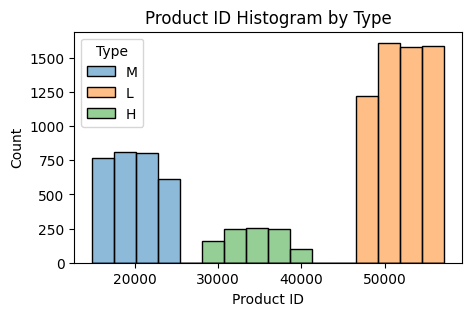

In [13]:
ax, fig = plt.subplots(figsize = (5,3))
sns.histplot(data=df, x="Product ID", hue = "Type")
fig.set_title("Product ID Histogram by Type")
plt.show()

From this histogram, we can identify that product id column does not carry any significant information that might help uncover hidden patterns in machine failures; therefore, it is safe to remove the column.

In [14]:
df.drop("Product ID", axis =1, inplace=True)

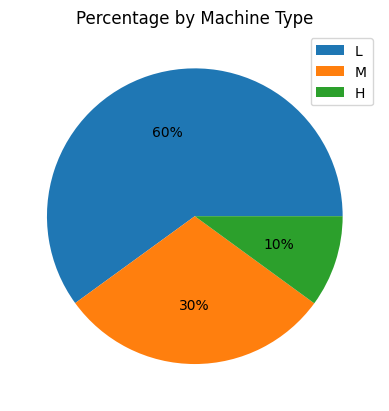

In [15]:
type_temp = df.value_counts("Type").reset_index(name='count')
type_temp["perc"] = type_temp["count"] / sum(type_temp["count"]) * 100
plt.pie(type_temp["perc"], autopct='%.0f%%')
plt.title("Percentage by Machine Type")
plt.legend(["L", "M", "H"])
plt.show()

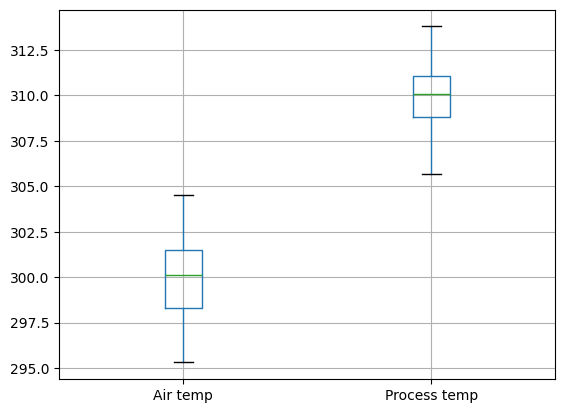

In [16]:
# Box plot of temperatures in Kelvin
df.boxplot(column = ["Air temp", "Process temp"])
plt.show()

In [17]:
# Data validation
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [18]:
# Data validation
df.groupby(["Failure Type"]).sum()["Target"]

Failure Type
Heat Dissipation Failure    112
No Failure                    9
Overstrain Failure           78
Power Failure                95
Random Failures               0
Tool Wear Failure            45
Name: Target, dtype: int64

We notice that there are some errors in the data. We have 9 rows where it is categorized as "No Failure" but is not marked as 0 in the Target column. Plus, we have 18 "Random Failures" rows where it is marked as "0" in the Target column.

In [19]:
# Verify errors
df[['Target', 'Failure Type']][df['Failure Type'] == 'Random Failures']

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [20]:
# Verify errors
df[['Target', 'Failure Type']][(df['Failure Type'] == "No Failure") & (df['Target'] != 0)]

,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


Because we aren't sure why they are recorded this way, we will go ahead and remove these rows.

In [21]:
err1 = df[['Target', 'Failure Type']][df['Failure Type'] == 'Random Failures'].index
err2 = df[['Target', 'Failure Type']][(df['Failure Type'] == "No Failure") & (df['Target'] != 0)].index

In [22]:
df.drop(err1, inplace = True)
df.drop(err2, inplace = True)

In [23]:
df.reset_index(inplace = True, drop = True)

In [24]:
df.shape

(9973, 8)

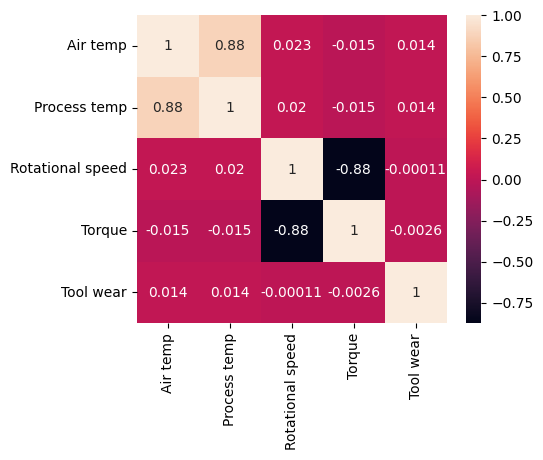

In [25]:
# Correlation Heatmap
df_num = df.drop(["Type", "Failure Type", "Target"], axis = 1)
corr = df_num.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True)
plt.show()

We notice that process temperature and air temperature show high correlation, as well as rotational speed and Torque variable. This will be helpful gogin forward in feature selection.

### Data Preprocessing
1. Oversampling with SMOTE
2. Features scaling and encoding

In [26]:
target_temp = df.value_counts("Target").reset_index(name='count')
target_temp["perc"] = target_temp["count"] / sum(target_temp["count"]) * 100
target_temp

,Target,count,perc
0,0,9643,96.691066
1,1,330,3.308934


Because our target variable is imbalanced, with failure data consisting of only ~3.3%, we should oversample the data using SMOTENC (Synthetic Minority Oversampling Technique for Nominal and Continuous data).

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# We want 'No Failure' machines to take up around 80% of the resampled data, and have each failure types to be equal in numbers.
nf = df['Failure Type'].value_counts()['No Failure']
total = round(nf / 0.8)
fail = round((total - nf) / 4)

allocation = {'No Failure':nf,
                 'Overstrain Failure':fail,
                 'Heat Dissipation Failure':fail,
                 'Power Failure':fail,
                 'Tool Wear Failure':fail}

smote_nc = SMOTENC(categorical_features=[0,7], sampling_strategy=allocation, random_state=42)
df_resampled, y_resampled = smote_nc.fit_resample(df, df['Failure Type'])

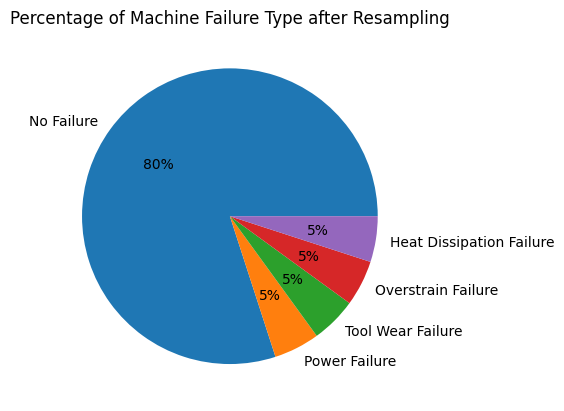

In [28]:
resam = y_resampled.value_counts().reset_index(name="count")
plt.pie(resam['count'], labels = resam['Failure Type'], autopct='%.0f%%')
plt.title('Percentage of Machine Failure Type after Resampling')
plt.show()

#### Features scaling and encoding

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding
category_order = [['L', 'M', 'H'],  # For 'Type'
                  ['No Failure', 'Overstrain Failure', 'Heat Dissipation Failure',
                   'Power Failure', 'Tool Wear Failure']]   # For 'Failure Type'
encoder = OrdinalEncoder(categories=category_order)
cols_to_encode = ['Type', 'Failure Type']

df_res1 = df_resampled.copy()
df_res1[cols_to_encode] = encoder.fit_transform(df_res1[cols_to_encode])

In [30]:
# Scaling
scalar = StandardScaler()
numerical_features = ['Air temp', 'Process temp', 'Rotational speed', 'Torque', 'Tool wear']
df_res1[numerical_features] = scalar.fit_transform(df_res1[numerical_features])

In [31]:
df_res1.describe()

,Type,Air temp,Process temp,Rotational speed,Torque,Tool wear,Target,Failure Type
count,12055.000000,1.205500e+04,1.205500e+04,1.205500e+04,1.205500e+04,1.205500e+04,12055.000000,12055.000000
mean,0.453671,-1.325953e-14,1.923859e-15,1.084528e-16,5.469794e-16,-7.544543e-17,0.200083,0.500207
std,0.652742,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.400079,1.118266
min,0.000000,-2.434100e+00,-3.023857e+00,-1.649024e+00,-3.217793e+00,-1.740074e+00,0.000000,0.000000
25%,0.000000,-8.198913e-01,-7.954035e-01,-6.162694e-01,-6.594268e-01,-8.637432e-01,0.000000,0.000000
50%,0.000000,3.765733e-02,4.026655e-02,-2.176625e-01,-1.130728e-02,1.258721e-02,0.000000,0.000000
75%,1.000000,7.943179e-01,6.792944e-01,3.123036e-01,6.414009e-01,9.037707e-01,0.000000,0.000000
max,2.000000,2.206751e+00,2.616916e+00,6.132871e+00,2.990509e+00,2.017750e+00,1.000000,4.000000


The data has now been correctly scaled and encoded.

### Modeling

In [100]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time

In [101]:
# Train, validation, test split
X, y = df_res1.drop(['Target', 'Failure Type'], axis=1), df_res1[['Target', 'Failure Type']]
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, stratify = df_res1['Failure Type'], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify = y_trainval['Failure Type'], random_state=42)

In [102]:
# Models
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability = True)
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [103]:
classifier = [lr, knn, svc, rf, xgb]
clf_str = ['LR','KNN','SVC','RFC','XGB'] 

def eval_preds(model,X,y_true,y_pred):
    # Extract task target
    y_true = y_true['Target']
    cm = confusion_matrix(y_true, y_pred)
    # Probability of the minority class
    proba = model.predict_proba(X)[:,1]
    # Metrics
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, proba)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    f2 = fbeta_score(y_true, y_pred, pos_label=1, beta=2)
    metrics = pd.Series(data={'ACC':acc, 'AUC':auc, 'F1':f1, 'F2':f2})
    metrics = round(metrics,3)
    return cm, metrics

def fit_models(clf, clf_str, X_train, X_val, y_train, y_val):
    metrics = pd.DataFrame(columns = clf_str)
    for model, model_name in zip(clf, clf_str):
        model.fit(X_train, y_train['Target'])
        y_val_pred = model.predict(X_val)
        metrics[model_name] = eval_preds(model, X_val, y_val, y_val_pred)[1]
    return metrics

In [104]:
metrics = fit_models(classifier, clf_str, X_train, X_val, y_train, y_val)

In [105]:
metrics

,LR,KNN,SVC,RFC,XGB
ACC,0.882,0.964,0.955,0.982,0.978
AUC,0.916,0.986,0.988,0.998,0.998
F1,0.668,0.913,0.886,0.956,0.946
F2,0.622,0.929,0.883,0.958,0.959


For all of the models that have predicted on the validation set, random forecast and XGBoost seem to perform the best on all metrics.

In [106]:
test_metrics = fit_models(classifier, clf_str, X_train, X_test, y_train, y_test)

In [107]:
test_metrics

,LR,KNN,SVC,RFC,XGB
ACC,0.877,0.956,0.947,0.982,0.980
AUC,0.893,0.984,0.985,0.998,0.998
F1,0.648,0.894,0.866,0.954,0.950
F2,0.595,0.915,0.859,0.952,0.953


In [116]:
rf.fit(X_train, y_train['Target'])
pred_rf = rf.predict(X_test)
f1_rf = f1_score(y_test['Target'], pred_rf, pos_label=1)
print(f'F1 score with random forest on test set: {round(f1_rf, 3)*100}%')

F1 score with random forest on test set: 94.8%


In [118]:
cm_rf = confusion_matrix(y_test['Target'], pred_rf.round())
print("Confusion Matrix - Random Forest")
print(cm_rf)

Confusion Matrix - Random Forest
[[953  12]
 [ 13 228]]


In [125]:
xgb.fit(X_train, y_train['Target'])
pred_xgb = xgb.predict(X_test)
f1_xgb = f1_score(y_test['Target'], pred_xgb, pos_label=1)
print(f'F1 score with XGBoost on test set: {round(f1_xgb, 3)*100}%')

F1 score with XGBoost on test set: 95.0%


In [126]:
cm_xgb = confusion_matrix(y_test['Target'], pred_xgb.round())
print("Confusion Matrix - Random Forest")
print(cm_xgb)

Confusion Matrix - Random Forest
[[952  13]
 [ 11 230]]


In [123]:
import itertools
# confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


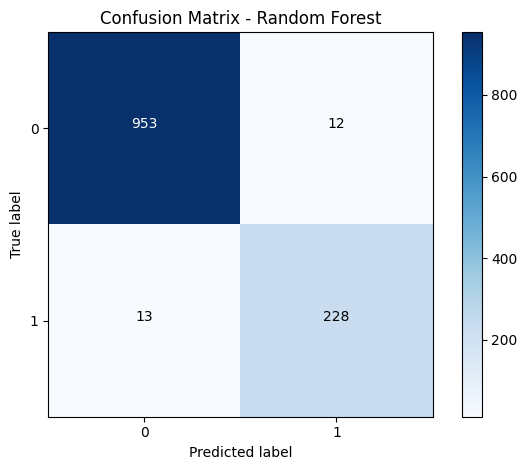

In [124]:
plot_confusion_matrix(cm_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

Confusion matrix, without normalization


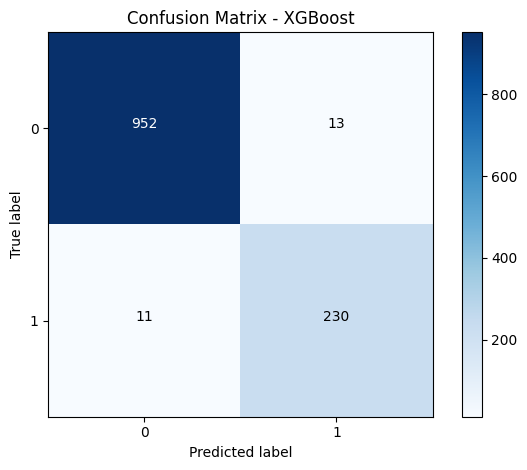

In [128]:
plot_confusion_matrix(cm_xgb, classes=[0, 1], title= "Confusion Matrix - XGBoost")

Overall, our random forest and XGBoost models performed the best, both achieving f1 scores of around 95%. Out of over 1200 sampled machines, our model was able to correctly predict 1,182 of machines on machine failures, while the model predicted around 25 machines incorrectly. We can conclude that for both task the chosen models perform very well.